# <center><font color = "green">Human Activity Recognition using Smartphone data</font></center>

# Description of experiment
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

### Notebook - Table of Content

1. **Importing necessary libraries**
2. **Loading data**
3. **Data preprocessing**
    - 3.a Checking for duplicates
    - 3.b Checking for missing values
    - 3.c Checking for class imbalance
4. **Exploratory Data Analysis**
    - 4.a Analysing tBodyAccMag-mean feature
    - 4.b Analysing Angle between X-axis and gravityMean feature
    - 4.c Analysing Angle between Y-axis and gravityMean feature
    - 4.d Visualizing data using t-SNE
5. **Model Prediction and Evaluation**
    - 5.a Logistic regression model with Hyperparameter tuning and cross validation
    - 5.b Linear SVM model with Hyperparameter tuning and cross validation
    - 5.c Kernel SVM model with Hyperparameter tuning and cross validation
    - 5.d Decision tree model with Hyperparameter tuning and cross validation
    - 5.e Random forest model with Hyperparameter tuning and cross validation

# 1. Importing Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# 2. Loading the Data

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [6]:
train['subject'].value_counts()

25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64

# 3. Data Preprocessing

3.a Checking for Duplicates

In [9]:
print('Number of duplicates in train dataset : ', train.duplicated().sum())
print('Number of duplicates in test dataset  : ', test.duplicated().sum())

Number of duplicates in train dataset :  0
Number of duplicates in test dataset  :  0


3.b Checking for Null Values

In [12]:
print('Number of Null Values in train dataset : ', train.isna().values.sum())
print('Number of Null Values in test dataset  : ', test.isna().values.sum())

Number of Null Values in train dataset :  0
Number of Null Values in test dataset  :  0


3.c Checking for class imbalance

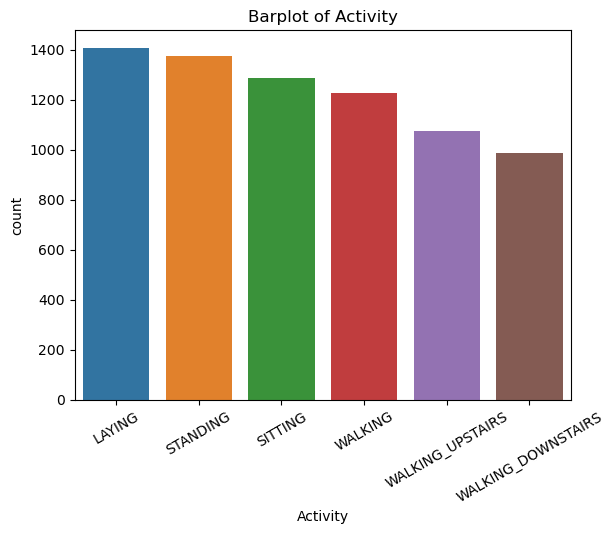

In [23]:
plt.title('Barplot of Activity')
sns.countplot(train, x = train['Activity'], order = train['Activity'].value_counts().index)
plt.xticks(rotation = 30)
plt.show()

The number of observations across all the six activities are almost same, so this data does not have any class imbalance problem.

# 4. Exploratory Data Analysis

In [24]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [36]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]),
                       orient = 'index').rename(columns = {0:'count'}).sort_values('count', ascending = False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


4.a Analysing tBodyAccMag-Mean feature

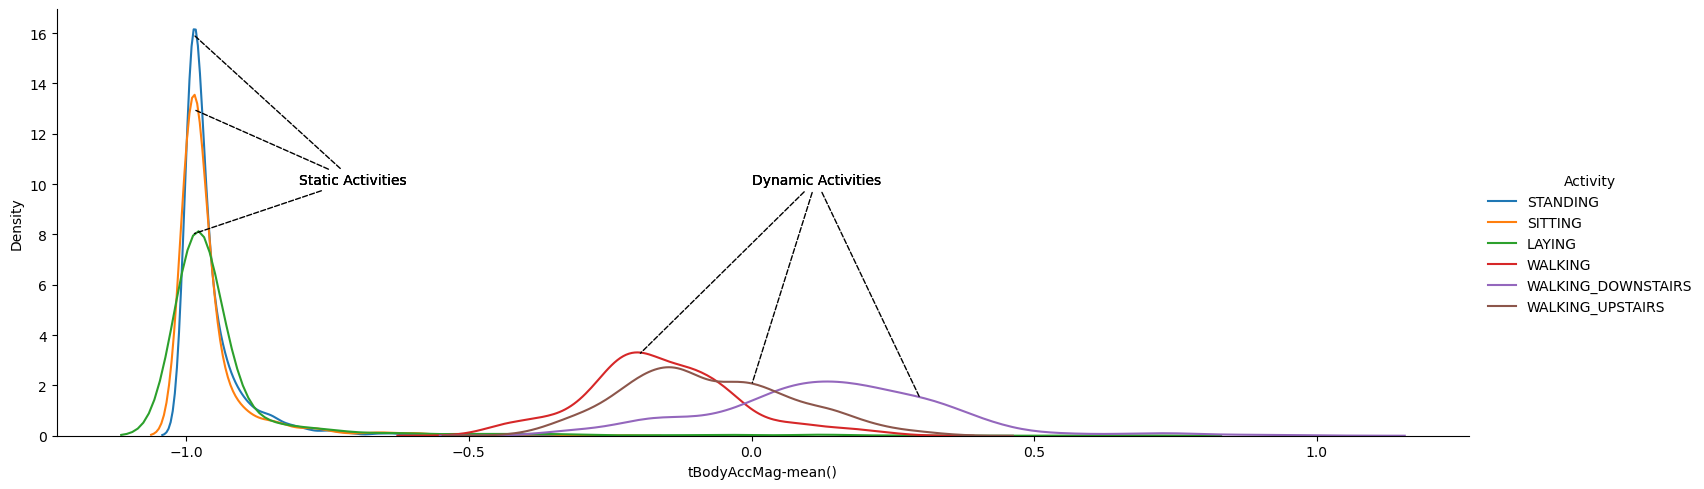

In [66]:
facetgrid = sns.FacetGrid(data = train, hue = 'Activity', height = 5, aspect = 3)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist = False).add_legend()

plt.annotate('Static Activities', xy = (-.99, 8), xytext = (-.8, 10), arrowprops = {'arrowstyle' : '-', 'ls' : 'dashed'})
plt.annotate('Static Activities', xy = (-.99, 13), xytext = (-.8, 10), arrowprops = {'arrowstyle' : '-', 'ls' : 'dashed'})
plt.annotate('Static Activities', xy = (-.99, 16), xytext = (-.8, 10), arrowprops = {'arrowstyle' : '-', 'ls' : 'dashed'})

plt.annotate('Dynamic Activities', xy = (.3, 1.4), xytext = (0, 10), arrowprops = {'arrowstyle' : '-', 'ls' : 'dashed'})
plt.annotate('Dynamic Activities', xy = (0, 2), xytext = (0, 10), arrowprops = {'arrowstyle' : '-', 'ls' : 'dashed'})
plt.annotate('Dynamic Activities', xy = (-.2, 3.2), xytext = (0, 10), arrowprops = {'arrowstyle' : '-', 'ls' : 'dashed'})

plt.show()

Using the above density plot we can easily come with a condition to seperate static activities from dynamic activities.

``` 
if(tBodyAccMag-mean()<=-0.5):
    Activity = "static"
else:
    Activity = "dynamic"
```

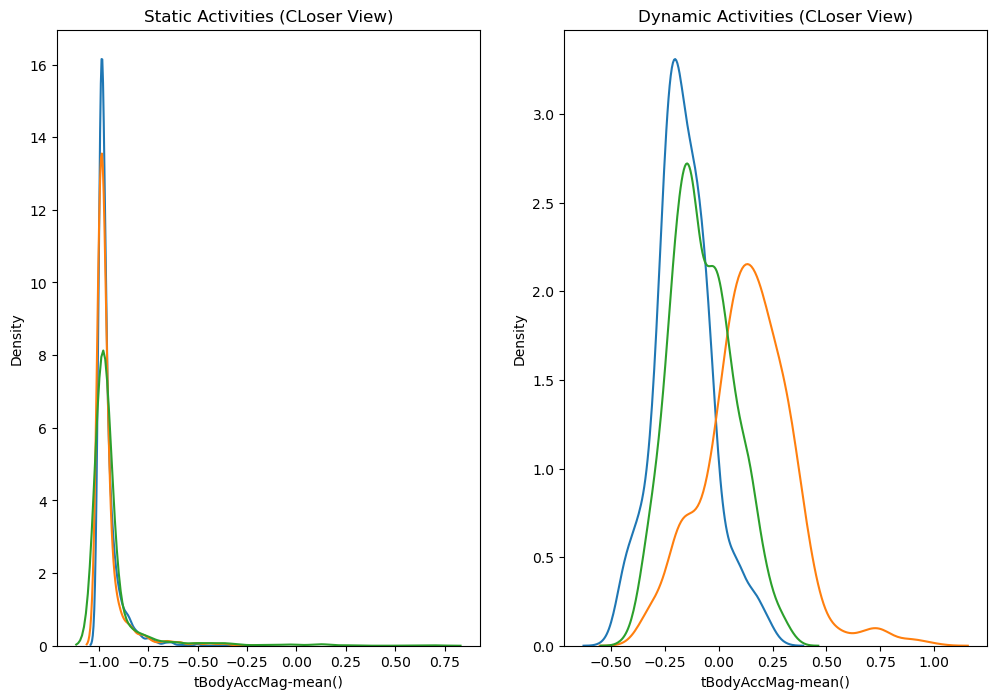

In [70]:
plt.figure(figsize = (12, 8))
plt.subplot(1, 2, 1)
plt.title('Static Activities (CLoser View)')
sns.distplot(train[train['Activity'] == 'STANDING']['tBodyAccMag-mean()'], hist = False, label = 'Standing')
sns.distplot(train[train['Activity'] == 'SITTING']['tBodyAccMag-mean()'], hist = False, label = 'Sitting')
sns.distplot(train[train['Activity'] == 'LAYING']['tBodyAccMag-mean()'], hist = False, label = 'Laying')

plt.subplot(1, 2, 2)
plt.title('Dynamic Activities (CLoser View)')
sns.distplot(train[train['Activity'] == 'WALKING']['tBodyAccMag-mean()'], hist = False, label = 'Walking')
sns.distplot(train[train['Activity'] == 'WALKING_DOWNSTAIRS']['tBodyAccMag-mean()'], hist = False, label = 'Walking Downstairs')
sns.distplot(train[train['Activity'] == 'WALKING_UPSTAIRS']['tBodyAccMag-mean()'], hist = False, label = 'Walking Upstairs')

plt.show()

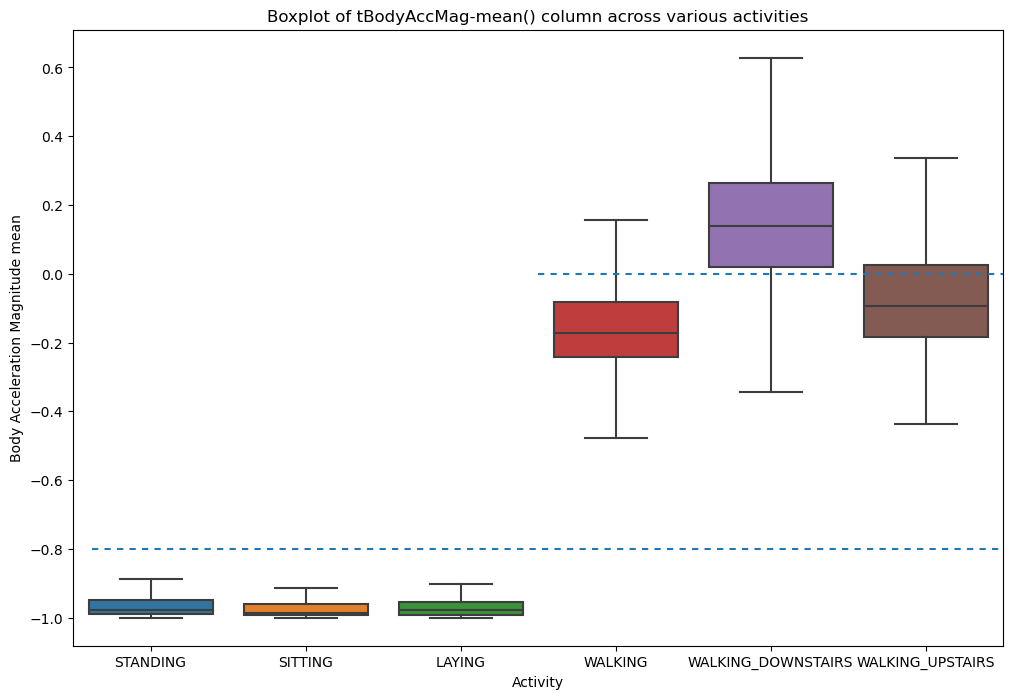

In [85]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = 'Activity', y = 'tBodyAccMag-mean()', data = train, showfliers = False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")
plt.axhline(y = -0.8, xmin = 0.02, dashes = (3, 3))
plt.axhline(y= 0.0, xmin = 0.5, dashes=(3, 3))
plt.show()

Using boxplot again we can come with conditions to seperate static activities from dynamic activities.

    if(tBodyAccMag-mean()<=-0.8):
        Activity = "static"
    if(tBodyAccMag-mean()>=-0.6):
        Activity = "dynamic"
        
Also, we can easily seperate WALKING_DOWNSTAIRS activity from others using boxplot.

    if(tBodyAccMag-mean()>0.02):
        Activity = "WALKING_DOWNSTAIRS"
    else:
        Activity = "others"

4.b Analysing Angle between X-axis and gravityMean feature

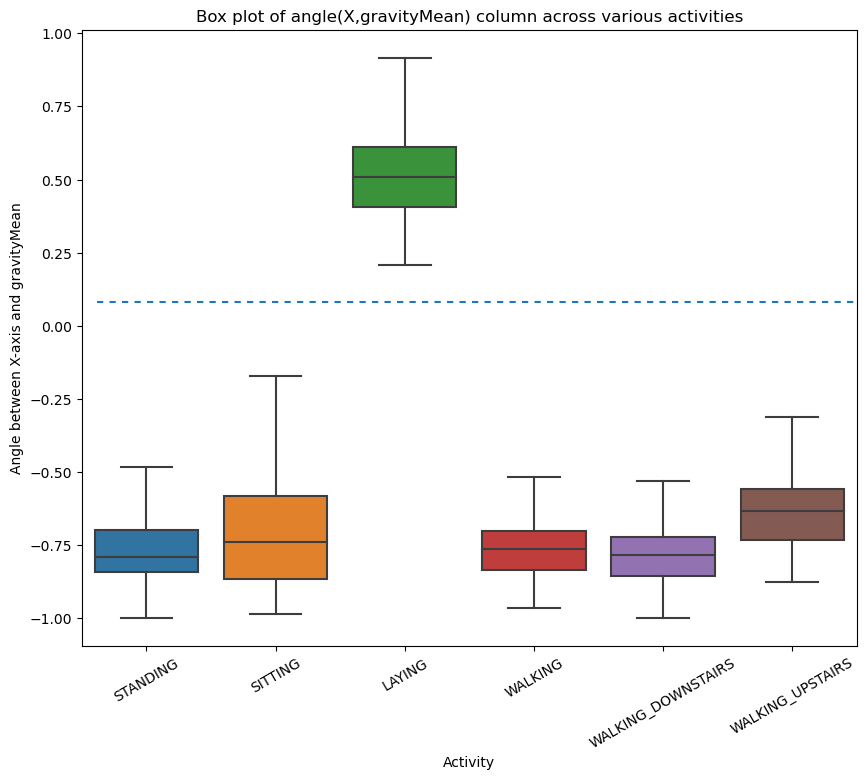

In [96]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'Activity', y = 'angle(X,gravityMean)', data = train, showfliers = False)
plt.axhline(xmin = 0.02, y = 0.08, dashes = (3, 3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation = 30)

plt.show()

From the boxplot we can observe that angle(X,gravityMean) perfectly seperates LAYING from other activities.
``` 
if(angle(X,gravityMean)>0.01):
    Activity = "LAYING"
else:
    Activity = "others"
```

4.c Analysing Angle between Y-axis and gravityMean feature

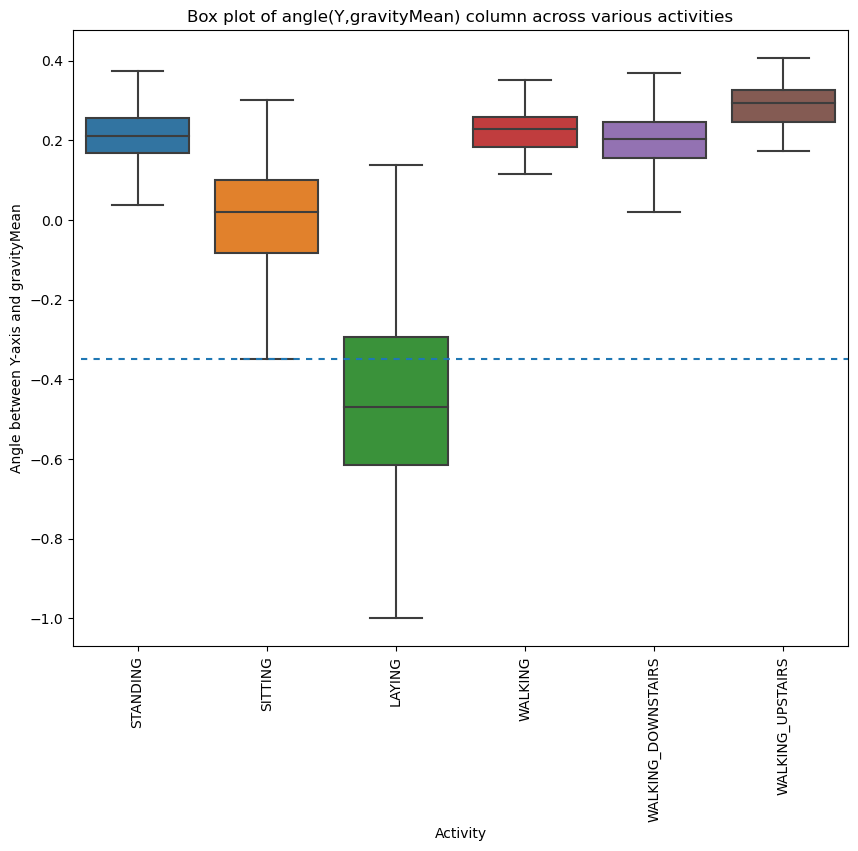

In [99]:
plt.figure(figsize=(10,8))
sns.boxplot(x = 'Activity', y = 'angle(Y,gravityMean)', data = train, showfliers = False)
plt.axhline(y = -0.35, xmin = 0.01, dashes=(3,3))
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title('Box plot of angle(Y,gravityMean) column across various activities')
plt.xticks(rotation = 90)

plt.show()

4.d Visualizing data using PCA

Using PCA, data can be visualized from a extremely high dimensional space to a low dimensional space and still it retains lots of actual information. Given training data has 561 unqiue features, using PCA let's visualize it to a 2D space.

In [109]:
x_for_pca = train.drop(['subject', 'Activity'], axis = 1)
pca = PCA(n_components = 2, random_state = 0).fit_transform(x_for_pca)

In [110]:
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

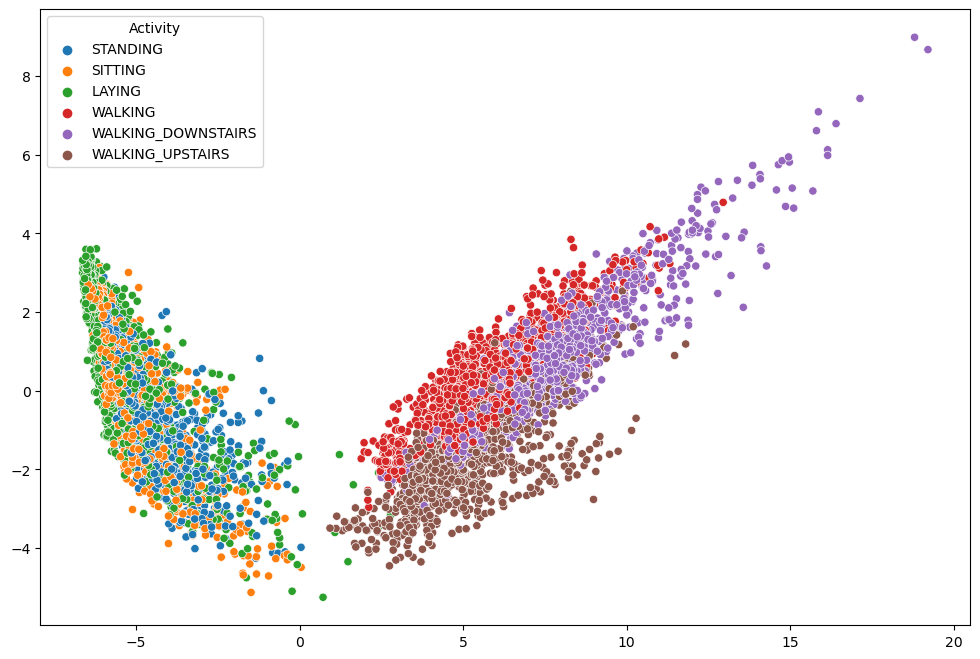

In [111]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = pca[:, 0], y = pca[:, 1], hue = train['Activity'])
plt.show()

4.d Visualizing data using t-SNE

Using t-SNE data can be visualized from a extremely high dimensional space to a low dimensional space and still it retains lots of actual information. Given training data has 561 unqiue features, using t-SNE let's visualize it to a 2D space.

In [112]:
x_for_tsne = train.drop(['subject', 'Activity'], axis = 1)
tsne = TSNE(n_components = 2, random_state = 0, n_iter = 1000).fit_transform(x_for_tsne)

In [113]:
tsne

array([[ -6.9932804, -63.188377 ],
       [-25.07103  , -17.728373 ],
       [-27.199108 , -20.449244 ],
       ...,
       [ 23.136957 , -60.145756 ],
       [ 23.117773 , -59.890156 ],
       [ 23.605974 , -59.11817  ]], dtype=float32)

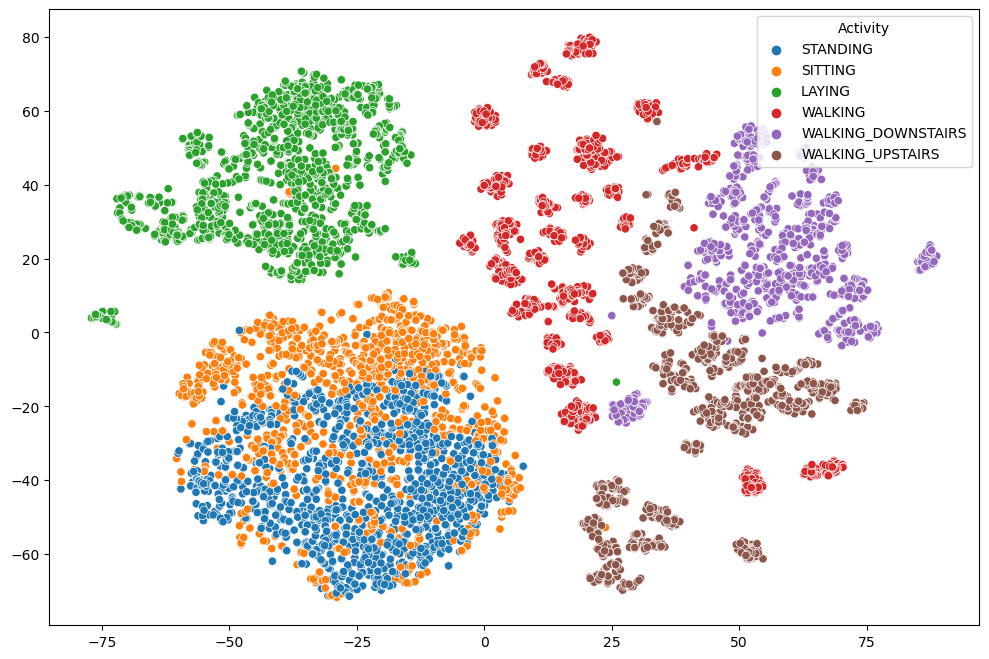

In [114]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = tsne[:, 0], y = tsne[:, 1], hue = train['Activity'])
plt.show()

# 5. ML models

Getting training and test data ready

In [117]:
x_train = train.drop(['subject', 'Activity'], axis = 1)
y_train = train['Activity']
x_test = test.drop(['subject', 'Activity'], axis = 1)
y_test = test['Activity']

In [118]:
print('Dimension of x train: ', x_train.shape)
print('Dimension of x test: ', x_test.shape)

Dimension of x train:  (7352, 561)
Dimension of x test:  (999, 561)


## 5.a Logistic regression model with Hyperparameter tuning and cross validation

In [119]:
parameters = {'max_iter' : [100, 200, 500]}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions = parameters, cv = 5, random_state = 42)
lr_classifier_rs.fit(x_train, y_train)
y_pred_lr = lr_classifier_rs.predict(x_test)

In [121]:
lr_accuracy = accuracy_score(y_true = y_test, y_pred = y_pred_lr)
print('Accuracy using Logistic Regression: ', lr_accuracy)

Accuracy using Logistic Regression:  0.954954954954955


In [125]:
# function to plot confusion matrix
def plot_confusion_matrix(cm, labels):
    fig, ax = plt.subplots(figsize = (12, 8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
    ax.figure.colorbar(im, ax = ax)
    ax.set(xticks = np.arange(cm.shape[1]),
           yticks = np.arange(cm.shape[0]),
           xticklabels = labels,
           yticklabels = labels,
           ylabel = 'True label',
           xlabel = 'Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha = "center", va = "center",color = "white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

In [126]:
cm = confusion_matrix(y_test.values, y_pred_lr)
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 146,  21,   0,   0,   3],
       [  0,   8, 170,   0,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,  13,   0, 136]], dtype=int64)

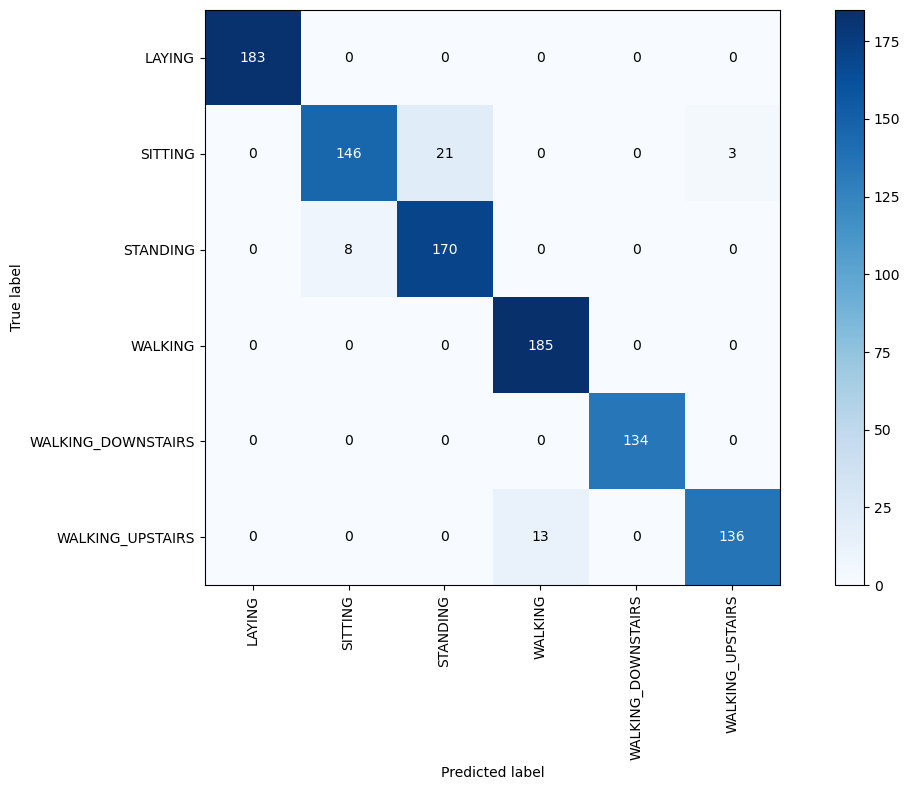

In [124]:
plot_confusion_matrix(cm, np.unique(y_pred_lr))

In [127]:
#function to get best random search attributes
def get_best_randomsearch_results(model):
    print("Best estimator : ", model.best_estimator_)
    print("Best set of parameters : ", model.best_params_)
    #print("Best score : ", model.best_score_)

In [128]:
get_best_randomsearch_results(lr_classifier_rs)

Best estimator :  LogisticRegression(max_iter=200)
Best set of parameters :  {'max_iter': 200}


## 5.b Kernel SVM model with Hyperparameter tuning and cross validation

In [130]:
parameters = {
    'kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],
    'C' : [100, 50]
}

svm_rs = RandomizedSearchCV(SVC(), param_distributions = parameters, cv = 3, random_state = 42)
svm_rs.fit(x_train, y_train)
y_pred_svm = svm_rs.predict(x_test) 

In [131]:
svm_accuracy = accuracy_score(y_true = y_test, y_pred = y_pred_svm)
print('Accuracy using Logistic Regression: ', svm_accuracy)

Accuracy using Logistic Regression:  0.965965965965966


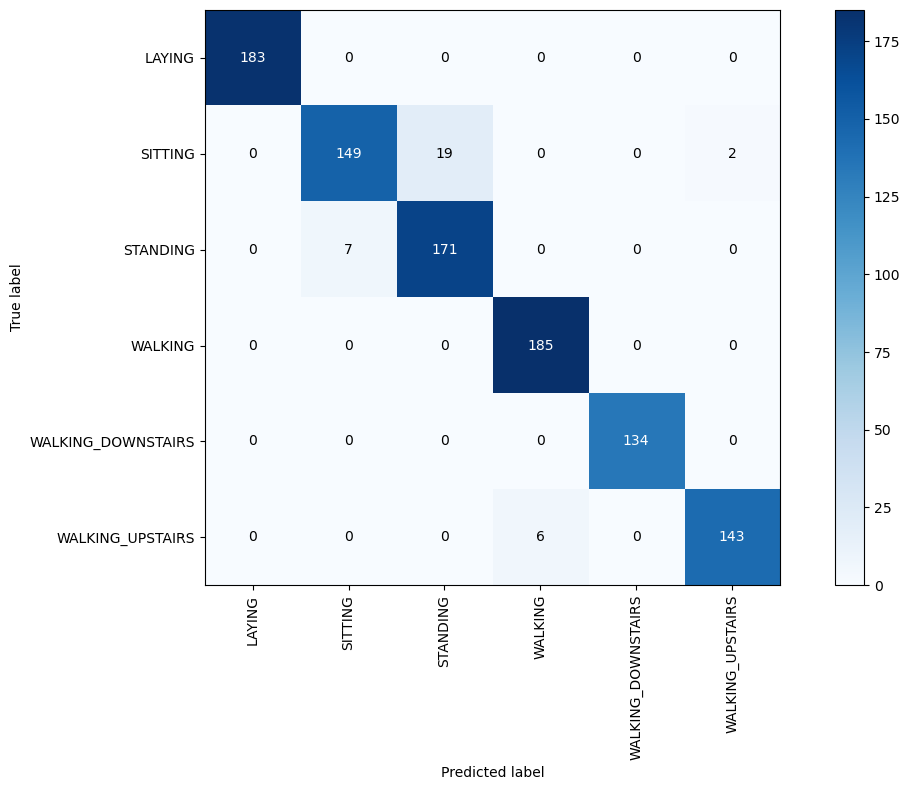

In [132]:
cm = confusion_matrix(y_test.values, y_pred_svm)
plot_confusion_matrix(cm, np.unique(y_pred_svm))

In [133]:
get_best_randomsearch_results(svm_rs)

Best estimator :  SVC(C=50)
Best set of parameters :  {'kernel': 'rbf', 'C': 50}


## 5.c Decision tree model with Hyperparameter tuning and cross validation

In [134]:
parameters = {'max_depth' : np.arange(2, 11, 2)}

dtc_rs = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv = 3, random_state = 42)
dtc_rs.fit(x_train, y_train)
y_pred_dtc = dtc_rs.predict(x_test)

In [135]:
dtc_accuracy = accuracy_score(y_true = y_test, y_pred = y_pred_dtc)
print('Accuracy using Logistic Regression: ', dtc_accuracy)

Accuracy using Logistic Regression:  0.8358358358358359


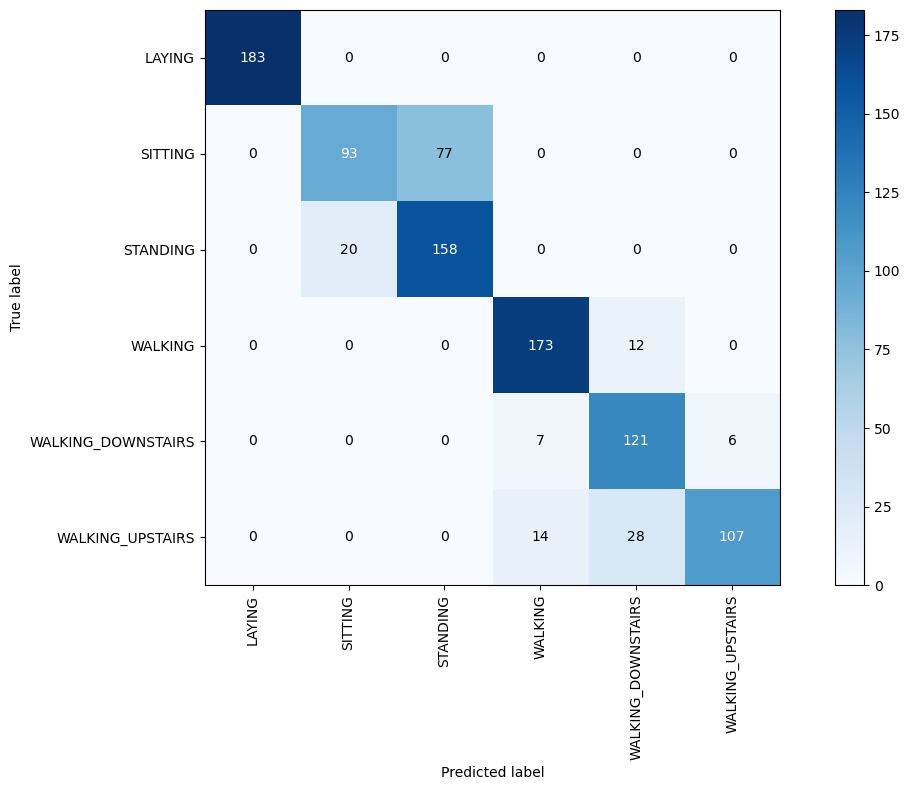

In [138]:
cm = confusion_matrix(y_test.values, y_pred_dtc)
plot_confusion_matrix(cm, np.unique(y_pred_dtc))

In [139]:
get_best_randomsearch_results(dtc_rs)

Best estimator :  DecisionTreeClassifier(max_depth=6)
Best set of parameters :  {'max_depth': 6}


## 5.d Random forest model with Hyperparameter tuning and cross validation

In [140]:
parameters = {
    'n_estimators' : np.arange(20, 101, 10),
    'max_depth' : np.arange(2, 17, 2)}

rfc_rs = RandomizedSearchCV(RandomForestClassifier(), param_distributions = parameters, cv = 3, random_state = 42)
rfc_rs.fit(x_train, y_train)
y_pred_rfc = rfc_rs.predict(x_test)

In [141]:
get_best_randomsearch_results(rfc_rs)

Best estimator :  RandomForestClassifier(max_depth=14, n_estimators=20)
Best set of parameters :  {'n_estimators': 20, 'max_depth': 14}


In [142]:
rfc_accuracy = accuracy_score(y_true = y_test, y_pred = y_pred_rfc)
print('Accuracy using Logistic Regression: ', rfc_accuracy)

Accuracy using Logistic Regression:  0.918918918918919


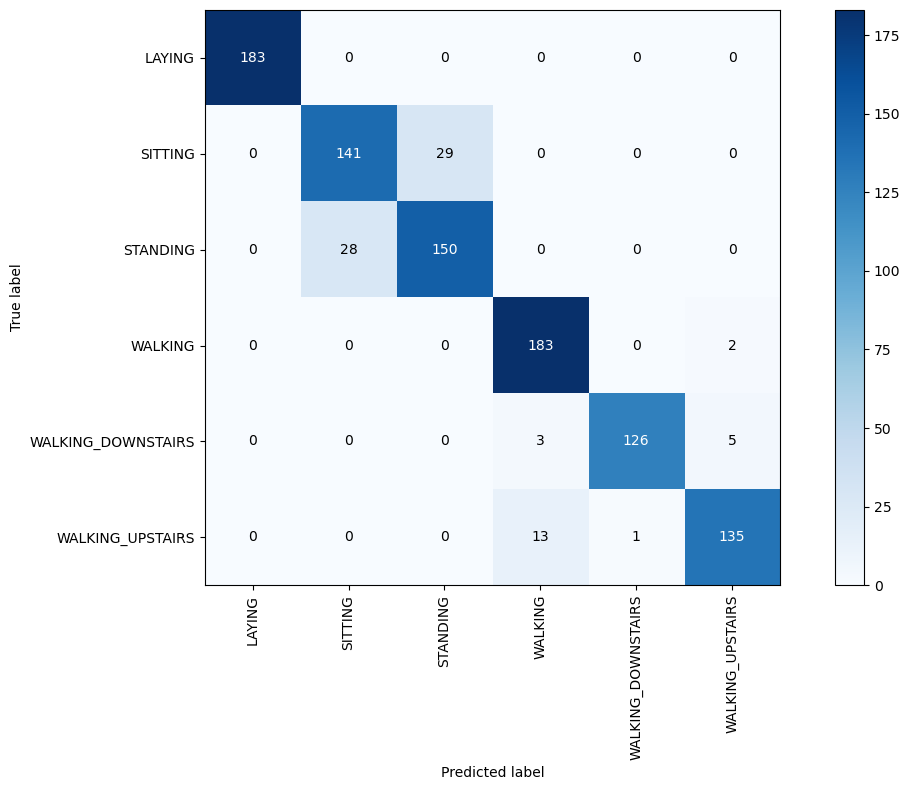

In [143]:
cm = confusion_matrix(y_test.values, y_pred_rfc)
plot_confusion_matrix(cm, np.unique(y_pred_rfc))